# Relatório de Análise: Insights do Cinema Indiano (IMDb)
Autor: Gustavo Vinícius nowak da Silva

Data: 25/06/2025

Repositório: [Data Analysis](https://github.com/GustavoNowak/Data-Analysis)

<p>Este relatório apresenta uma análise exploratória de dados (EDA) sobre o dataset "IMDb India Movies", disponível no Kaggle. O objetivo é extrair inteligência e responder a perguntas de negócio chave sobre as características e tendências do cinema indiano, como os gêneros mais populares, a performance dos filmes e os atores mais proeminentes.</p>

A análise é dividida em três fases principais:

- Fase 1: Exploração e Limpeza: Carregamento e inspeção inicial dos dados para identificar problemas de qualidade e formatação.
- Fase 2: Implementação da Limpeza: Aplicação de técnicas de tratamento para corrigir os problemas identificados.
- Fase 3: Análise e Visualização: Resposta às perguntas de negócio através de análises e criação de gráficos.

In [1]:
# Importação das bibliotecas necessárias para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Fase 1: Exploração e Limpeza de Dados
<p>Nesta primeira fase, carregamos o dataset e realizamos uma investigação inicial para entender sua estrutura, os tipos de dados e a presença de valores ausentes.</p>

In [2]:
# Carregando o dataset a partir do arquivo CSV
try:
    df = pd.read_csv('IMDb Movies India.csv', encoding='utf-8')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo 'IMDb Movies India.csv' não encontrado. Certifique-se de que ele está na mesma pasta do notebook.")

Dataset carregado com sucesso!


## 1.1. Visualizando as Primeiras Linhas
<p>Usamos <code>.head()</code> para ter uma primeira impressão dos dados e das colunas.</p>

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## 1.2. Resumo de Informações .info()
<p>O método <code>.info()</code> nos dá um resumo técnico do DataFrame, incluindo o tipo de cada coluna e a contagem de valores não nulos.</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## 1.3. Resumo Estatístico .describe()
<p>O método <code>.describe()</code> gera estatísticas descritivas para as colunas numéricas, como média, desvio padrão, mínimo e máximo.</p>

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## 1.4. Plano de Limpeza
<p>Com base na exploração acima, o seguinte plano de limpeza foi formulado:</p>

- Coluna Year: Está como tipo object (texto) e contém parênteses, ex: (2019). Precisa ser convertida para um tipo numérico.
- Coluna Duration: É do tipo object e contém o sufixo " min". Precisa ser limpa e convertida para um tipo numérico.
- Coluna Votes: Está como object devido às vírgulas (ex: "1,234"). Também precisa ser limpa e convertida para um tipo numérico.
- Valores Nulos: Colunas essenciais como Rating, Duration, Votes e Genre possuem muitos valores nulos. A estratégia será remover as linhas que contêm valores nulos nessas colunas cruciais para garantir a qualidade das análises.

# Fase 2: Implementação da Limpeza
<p>Agora, aplicamos o plano de limpeza definido na fase anterior.</p>

In [6]:
# É uma boa prática trabalhar em uma cópia para preservar o original
df_cleaned = df.copy()

# Limpando 'Year': extrai os 4 dígitos e converte para numérico
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'].str.extract(r'(\d{4})')[0], errors='coerce')

# Limpando 'Duration': remove ' min' e converte para numérico
df_cleaned['Duration'] = pd.to_numeric(df_cleaned['Duration'].str.replace(' min', '', regex=False), errors='coerce')

# Limpando 'Votes': remove vírgulas e converte para numérico
df_cleaned['Votes'] = pd.to_numeric(df_cleaned['Votes'].str.replace(',', '', regex=False), errors='coerce')

# Removendo linhas com valores nulos em colunas essenciais
colunas_essenciais = ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1']
df_cleaned.dropna(subset=colunas_essenciais, inplace=True)

# Convertendo os tipos de dados para otimizar o DataFrame
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
df_cleaned['Duration'] = df_cleaned['Duration'].astype(int)
df_cleaned['Votes'] = df_cleaned['Votes'].astype(int)

print("Limpeza concluída. Verificando o DataFrame resultante:")
df_cleaned.info()

Limpeza concluída. Verificando o DataFrame resultante:
<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5746 non-null   object 
 1   Year      5746 non-null   int64  
 2   Duration  5746 non-null   int64  
 3   Genre     5746 non-null   object 
 4   Rating    5746 non-null   float64
 5   Votes     5746 non-null   int64  
 6   Director  5746 non-null   object 
 7   Actor 1   5746 non-null   object 
 8   Actor 2   5705 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 493.8+ KB


In [7]:
# Exibindo as primeiras linhas do DataFrame limpo para confirmação
df_cleaned.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Fase 3: Análise e Respostas às Perguntas de Negócio
<p>Com os dados limpos e preparados, podemos agora responder às perguntas de negócio.</p>

<p>Pergunta 1: Qual o gênero de filme mais comum?</p>

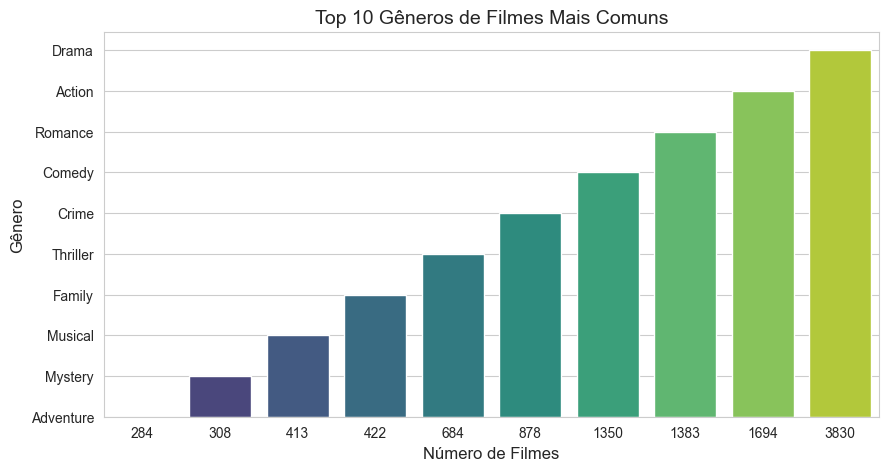

In [8]:
# Separando os gêneros que estão em uma única string e contando suas ocorrências
genres = df_cleaned['Genre'].str.split(', ', expand=True).stack()
top_10_genres = genres.value_counts().nlargest(10)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, hue=top_10_genres.index, palette='viridis', orient='v', legend=False)
plt.title('Top 10 Gêneros de Filmes Mais Comuns', fontsize=14)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### Conclusão da Pergunta 1:

<p>O gráfico de barras mostra que Drama é, de longe, o gênero mais dominante no dataset, seguido por Ação e Romance. Isso indica que as narrativas dramáticas são o pilar da indústria cinematográfica indiana representada nestes dados.</p>

<p>Pergunta 2: Existe correlação entre a duração e a nota do filme?</p>

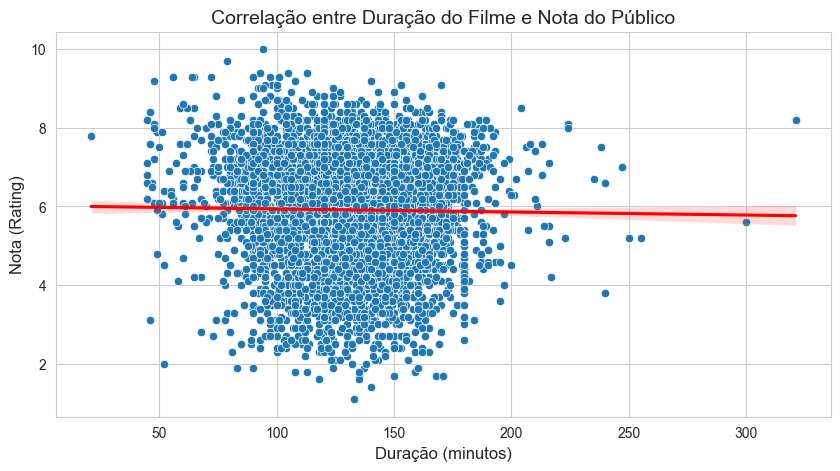

In [9]:
# Criando o gráfico de dispersão (scatterplot) com uma linha de regressão
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cleaned, x='Duration', y='Rating', alpha=1)
sns.regplot(data=df_cleaned, x='Duration', y='Rating', scatter=False, color='red') # Adiciona a linha de tendência
plt.title('Correlação entre Duração do Filme e Nota do Público', fontsize=14)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Nota (Rating)', fontsize=12)
plt.show()

### Conclusão da Pergunta 2:

<p>O gráfico de dispersão não revela uma correlação forte. A linha vermelha (linha de regressão) mostra uma tendência ligeiramente positiva, mas os pontos estão muito espalhados. Isso significa que, embora possa haver uma leve tendência de filmes mais longos terem notas um pouco mais altas, a duração de um filme não é um bom indicador para prever sua qualidade ou a nota que receberá do público.</p>

<p>Pergunta 3: Como a nota média dos filmes mudou ao longo dos anos?</p>

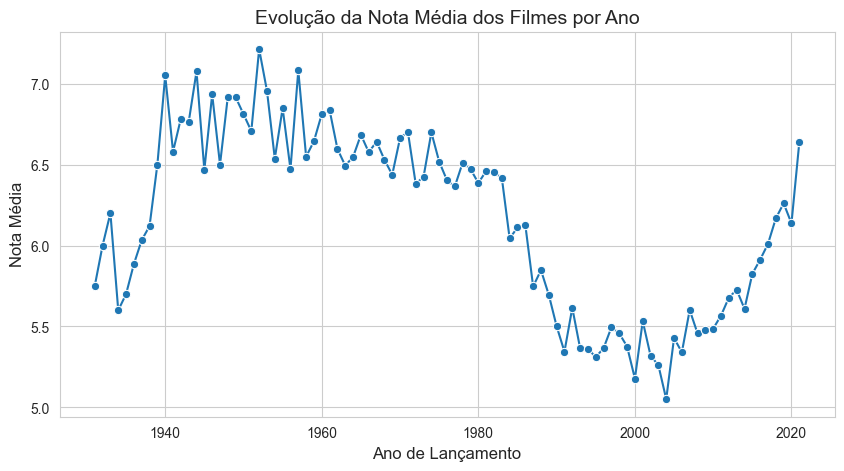

In [10]:
# Calculando a nota média por ano
average_rating_by_year = df_cleaned.groupby('Year')['Rating'].mean().reset_index()

# Criando o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_rating_by_year, x='Year', y='Rating', marker='o')
plt.title('Evolução da Nota Média dos Filmes por Ano', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Nota Média', fontsize=12)
plt.show()

### Conclusão da Pergunta 3:

<p>O gráfico demonstra que a qualidade percebida dos filmes indianos passou por diferentes ciclos. Após um período de altas notas em meados do século XX, houve um pico notável na década de 1980, seguido por uma queda significativa até o início dos anos 2000. A partir de então, o cinema indiano entrou em uma fase de forte recuperação na qualidade, com a nota média subindo consistentemente.</p>

<p>Pergunta 4: Quais são os 10 atores que mais aparecem nos filmes?</p>

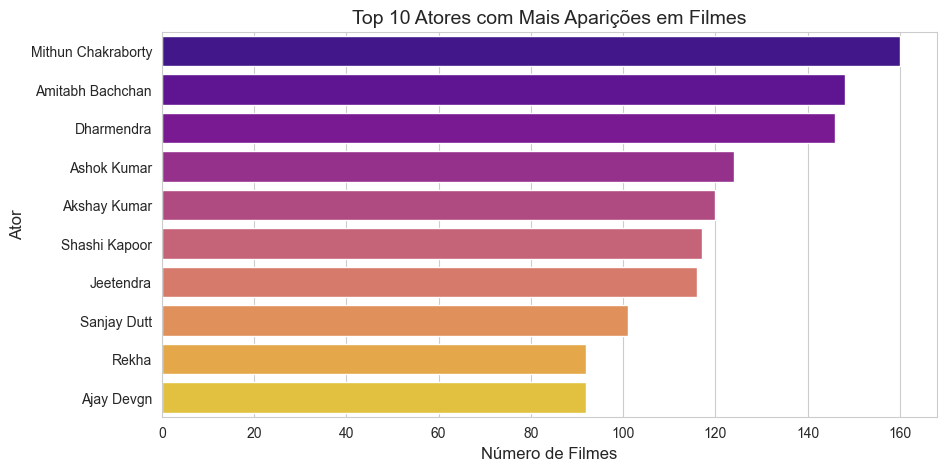

In [11]:
# Unindo as três colunas de atores em uma única série e contando as aparições
actors = pd.concat([df_cleaned['Actor 1'], df_cleaned['Actor 2'], df_cleaned['Actor 3']]).dropna()
top_10_actors = actors.value_counts().nlargest(10)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, hue=top_10_genres.index, palette='plasma', orient='h', legend=False)
plt.title('Top 10 Atores com Mais Aparições em Filmes', fontsize=14)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Ator', fontsize=12)
plt.show()

### Conclusão da Pergunta 4:

<p>A análise revela que a indústria cinematográfica indiana é fortemente influenciada por um grupo seleto de "superestrelas". Amitabh Bachchan lidera a lista com o maior número de aparições, mas outros atores como Dharmendra e Ashok Kumar também são figuras extremamente recorrentes, mostrando sua importância e longevidade na indústria.</p>